# 1. Import libraries and Do nessary formatting 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from math import sqrt
%matplotlib inline

fig_width = 6.9
golden_mean = (sqrt(5)-1.0)/2.0    # Aesthetic ratio
fig_height = fig_width*golden_mean # height in inches

params = {
   'axes.labelsize': 8,
   'text.latex.preamble': ['\\usepackage{gensymb}'],
   'font.size': 10,
    'axes.labelsize': 10, # fontsize for x and y labels (was 10)
    'axes.titlesize': 12,
   'legend.fontsize': 8,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': True,
   'figure.figsize': [fig_width,fig_height],
    'font.family': 'serif'
   }
rcParams.update(params)

## Load Titanic data set

In [2]:
data = pd.read_csv("Data/Titanic.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The variables that describe the passengers are:

* PassengerId: and id given to each traveler on the boat
* Pclass: the passenger class. It has three possible values: 1,2,3
* The Name
* The Sex
* The Age
* SibSp: number of siblings and spouses traveling with the passenger
* Parch: number of parents and children traveling with the passenger
* The ticket number
* The ticket Fare
* The cabin number
* The embarkation. It has three possible values S,C,Q

### statistically describe numerical features 

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The count variable shows that 177 values are missing in the Age column.

One solution is to replace the null values with the median age which is more robust to outliers than the mean.

In [5]:
data['Age'].fillna(data['Age'].median(), inplace=True)

Let's check that again.

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visualize data graphically

Let's look at a histogram of the age distribution. What can you tell from the graph?

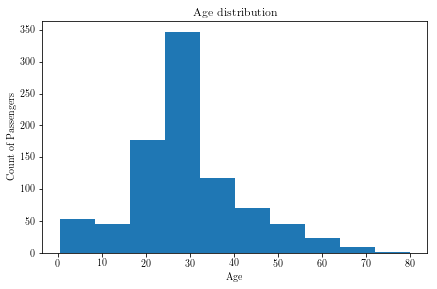

In [7]:
plot_name = "age_dist"
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(data['Age'], bins = 10, range = (data['Age'].min(),data['Age'].max()))
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')
plt.savefig('image/%s.pdf' %(plot_name), format='pdf')

Now let's look at a histogram of the fares. What does it tell you?

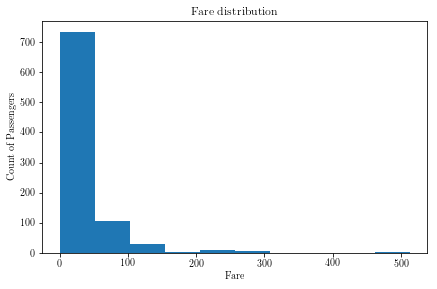

In [8]:
plot_name = "fair_dist"
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(data['Fare'], bins = 10, range = (data['Fare'].min(),data['Fare'].max()))
plt.title('Fare distribution')
plt.xlabel('Fare')
plt.ylabel('Count of Passengers')
plt.savefig('image/%s.pdf' %(plot_name), format='pdf')

#### Let's visualize survival based on the gender.

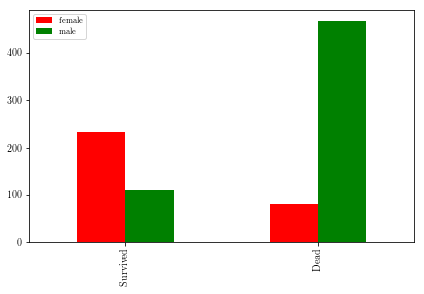

In [9]:
plot_name = "survival_gender"
survived_sex = data[data['Survived']==1]['Sex'].value_counts()
dead_sex = data[data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar', color = ['r','g'])
plt.savefig('image/%s.pdf' %(plot_name), format='pdf')

The Sex variable seems to be a decisive feature. Women are more likely to survive.

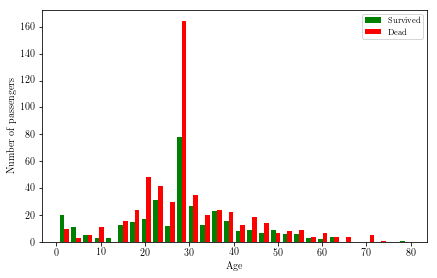

In [10]:
plot_name = "survival_age"
plt.hist([data[data['Survived']==1]['Age'], data[data['Survived']==0]['Age']], color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()
plt.savefig('image/%s.pdf' %(plot_name), format='pdf')

If you follow the chart bin by bin, you will notice that passengers who are less than 10 are more likely to survive than older ones who are more than 12 and less than 50. Older passengers seem to be rescued too.

These two first charts confirm that one old code of conduct that sailors and captains follow in case of threatening situations: "Women and children first !"

Let's now focus on the Fare ticket of each passenger and correlate it with the survival.

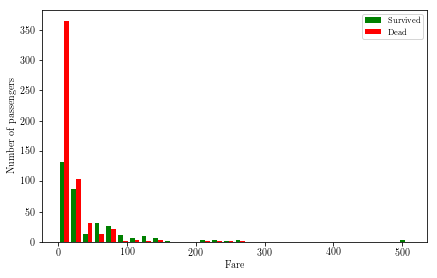

In [11]:
plot_name = "survival_fair"
plt.hist([data[data['Survived']==1]['Fare'],data[data['Survived']==0]['Fare']], color = ['g','r'],
         bins = 30,label = ['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()
plt.savefig('image/%s.pdf' %(plot_name), format='pdf')

Passengers with cheaper ticket fares are more likely to die. Put differently, passengers with more expensive tickets, and therefore a more important social status, seem to be rescued first.

In [12]:
survived_age =data[data['Survived']==1]['Age']
survived_fare =data[data['Survived']==1]['Fare']
dead_age =data[data['Survived']==0]['Age']
dead_fare =data[data['Survived']==0]['Fare']

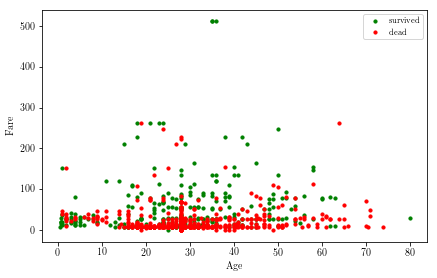

In [13]:
plot_name = "survival_fair_age"
ax = plt.subplot()
ax.scatter(survived_age,survived_fare,c='green',s=10)
ax.scatter(dead_age,dead_fare,c='red',s=10)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right')
plt.savefig('image/%s.pdf' %(plot_name), format='pdf')          

A distinct cluster of dead passengers (the red one) appears on the chart. Those people are adults (age between 15 and 50) of lower class (lowest ticket fares).